# SVMKyphosis_linear

Importing Library as follows

In [2]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [5]:
df = pd.read_csv("D:/Statistics (Python)/Cases/Kyphosis/Kyphosis.csv")

dum_df = pd.get_dummies(df, drop_first=True)

Import the necessary modules

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [8]:
X = dum_df.iloc[:,0:3]
y = dum_df.iloc[:,3]

 Create training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

svc = SVC(probability = True,kernel='linear')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))

[[20  0]
 [ 5  0]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



In [14]:
print(accuracy_score(y_test, y_pred))

0.8


 ROC

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

 Compute predicted probabilities: y_pred_prob

In [16]:
y_pred_prob = svc.predict_proba(X_test)[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 Plot ROC curve

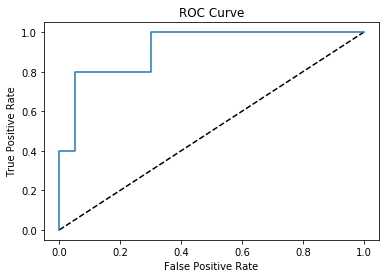

In [19]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
roc_auc_score(y_test, y_pred_prob)

0.9199999999999999

***Tunning*** 

Grid Search CV

In [21]:
from sklearn.model_selection import GridSearchCV

C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])

OR

In [22]:
C_range = np.linspace(0.001,2)
param_grid = dict( C=C_range)

***cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)***

Import necessary modules

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
kfold = StratifiedKFold(n_splits=5, random_state=42)
svmGrid = GridSearchCV(SVC(probability=True,kernel='linear'), 
                       param_grid=param_grid, cv=kfold, scoring="roc_auc",verbose=3)
svmGrid.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.808, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.821, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.718, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.897, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.833, total=   0.0s
[CV] C=0.04179591836734694 ...........................................
[CV] ............... C=0.04179591836734694, score=0.808, total=   0.0s
[CV] C=0.04179591836734694 ...........................................
[CV] ..........

[CV] ................ C=0.4497551020408163, score=0.667, total=   0.1s
[CV] C=0.4497551020408163 ............................................
[CV] ................ C=0.4497551020408163, score=0.897, total=   0.0s
[CV] C=0.4497551020408163 ............................................
[CV] ................ C=0.4497551020408163, score=0.833, total=   0.1s
[CV] C=0.49055102040816323 ...........................................
[CV] ............... C=0.49055102040816323, score=0.808, total=   0.0s
[CV] C=0.49055102040816323 ...........................................
[CV] ............... C=0.49055102040816323, score=0.821, total=   0.1s
[CV] C=0.49055102040816323 ...........................................
[CV] ............... C=0.49055102040816323, score=0.667, total=   0.1s
[CV] C=0.49055102040816323 ...........................................
[CV] ............... C=0.49055102040816323, score=0.897, total=   0.1s
[CV] C=0.49055102040816323 ...........................................
[CV] .

[CV] ................ C=0.9393061224489796, score=0.821, total=   0.2s
[CV] C=0.9393061224489796 ............................................
[CV] ................ C=0.9393061224489796, score=0.667, total=   0.1s
[CV] C=0.9393061224489796 ............................................
[CV] ................ C=0.9393061224489796, score=0.897, total=   0.1s
[CV] C=0.9393061224489796 ............................................
[CV] ................ C=0.9393061224489796, score=0.833, total=   0.1s
[CV] C=0.9801020408163265 ............................................
[CV] ................ C=0.9801020408163265, score=0.808, total=   0.1s
[CV] C=0.9801020408163265 ............................................
[CV] ................ C=0.9801020408163265, score=0.821, total=   0.2s
[CV] C=0.9801020408163265 ............................................
[CV] ................ C=0.9801020408163265, score=0.667, total=   0.4s
[CV] C=0.9801020408163265 ............................................
[CV] .

[CV] ................ C=1.3880612244897959, score=0.833, total=   0.2s
[CV] C=1.4288571428571428 ............................................
[CV] ................ C=1.4288571428571428, score=0.808, total=   0.1s
[CV] C=1.4288571428571428 ............................................
[CV] ................ C=1.4288571428571428, score=0.821, total=   0.2s
[CV] C=1.4288571428571428 ............................................
[CV] ................ C=1.4288571428571428, score=0.667, total=   0.3s
[CV] C=1.4288571428571428 ............................................
[CV] ................ C=1.4288571428571428, score=0.897, total=   0.2s
[CV] C=1.4288571428571428 ............................................
[CV] ................ C=1.4288571428571428, score=0.833, total=   0.1s
[CV] C=1.4696530612244896 ............................................
[CV] ................ C=1.4696530612244896, score=0.808, total=   0.2s
[CV] C=1.4696530612244896 ............................................
[CV] .

[CV] ................. C=1.877612244897959, score=0.667, total=   0.2s
[CV] C=1.877612244897959 .............................................
[CV] ................. C=1.877612244897959, score=0.897, total=   0.2s
[CV] C=1.877612244897959 .............................................
[CV] ................. C=1.877612244897959, score=0.833, total=   0.2s
[CV] C=1.918408163265306 .............................................
[CV] ................. C=1.918408163265306, score=0.808, total=   0.2s
[CV] C=1.918408163265306 .............................................
[CV] ................. C=1.918408163265306, score=0.821, total=   0.2s
[CV] C=1.918408163265306 .............................................
[CV] ................. C=1.918408163265306, score=0.667, total=   0.3s
[CV] C=1.918408163265306 .............................................
[CV] ................. C=1.918408163265306, score=0.897, total=   0.2s
[CV] C=1.918408163265306 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=...
       1.30646939e+00, 1.34726531e+00, 1.38806122e+00, 1.42885714e+00,
       1.46965306e+00, 1.51044898e+00, 1.55124490e+00, 1.59204082e+00,
       1.63283673e+00, 1.67363265e+00, 1.71442857e+00, 1.75522449e+00,
       1.79602041e+00, 1.83681633e+00, 1.87761224e+00, 1.91840816e+00,
       1.95920408e+00, 2.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

 Best Parameters

In [31]:
print(svmGrid.best_params_)

{'C': 0.04179591836734694}


In [32]:
print(svmGrid.best_score_)_

SyntaxError: invalid syntax (<ipython-input-32-54bba81e182b>, line 1)

 Random Grid Search CV 

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(SVC(probability=True,kernel='linear'),
                        random_state=2019,param_distributions=param_grid ,
                        cv=kfold,scoring='roc_auc',n_iter=15)

rcv.fit( X , y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n...
       1.30646939e+00, 1.34726531e+00, 1.38806122e+00, 1.42885714e+00,
       1.46965306e+00, 1.51044898e+00, 1.55124490e+00, 1.59204082e+00,
       1.63283673e+00, 1.67363265e+00, 1.71442857e+00, 1.75522449e+00,
       1.79602041e+00, 1.83681633e+00, 1.87761224e+00, 1.91840816e+00,
       1.95920408e+00, 2.00000000e+00])},
                   pre_dispatch='2*n_jobs', random_state=2019, refit=True,
   

In [35]:
print(rcv.best_params_)

{'C': 0.16418367346938775}


In [36]:
print(rcv.best_score_)  

0.8051282051282052


In [38]:
print(rcv.best_estimator_)

SVC(C=0.16418367346938775, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
